# Kaggle - AirBnB
## Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
?pd.read_csv

## Files

In [73]:
path = r"C:\Users\Romain\Documents\230 - MSc ESSEC\304 - Machine Learning\01 - Kaggle"
# train_users_2 : pour creer l'algo (213451 lignes)
train = pd.read_csv(path+'/Datasets/train_users_2.csv')

# age gender : repartition par pays des hommes et femmes par tranche d'age en milliers (2015)
#age_gender = pd.read_csv(path+'/Datasets/age_gender_bkts.csv')

# countries : descriptif des pays
#countries = pd.read_csv(path+'/Datasets/countries.csv')

# sessions : actions sur la sessions des utilisateurs shape == (10567737, 6)
sessions = pd.read_csv(path+'/Datasets/sessions.csv')

# test_users : pour tester l'algo (62096 lignes)
#test_users = pd.read_csv(path+r"\Datasets\test_users.csv", index_col=0)

### Data information

#### train_users.csv - the training set of users
#### test_users.csv - the test set of users
        id: user id
        date_account_created: the date of account creation
        timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
        date_first_booking: date of first booking
        gender
        age
        signup_method
        signup_flow: the page a user came to signup up from
        language: international language preference
        affiliate_channel: what kind of paid marketing
        affiliate_provider: where the marketing is e.g. google, craigslist, other
        first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
        signup_app
        first_device_type
        first_browser
        country_destination: this is the target variable you are to predict
#### sessions.csv - web sessions log for users
        user_id: to be joined with the column 'id' in users table
        action
        action_type
        action_detail
        device_type
        secs_elapsed
#### countries.csv - summary statistics of destination countries in this dataset and their locations
#### age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination
#### sample_submission.csv - correct format for submitting your predictions

## Keep in mind

In [3]:
# sortir un diagramme par couleur
# mat = pd.crosstab(train.language, train.country_destination, normalize=0)
# plt.matshow(mat)

# changer changer en 'category'

## Exploratory data
### Train
#### Reduire la taille du dataset en changeant de type (26.1MB à 9.6MB)
#### Creer colonne hour_first_active (9.8MB)

In [30]:
# Modify dtypes of columns
def format_variables(data):
    data['gender']=data['gender'].astype('category')
    data_category=data.columns
    for x in list(data_category[6:16]):
        data[x]=data[x].astype('category')
    
    data['age']=data['age'].fillna(0).astype(int)

    data['date_account_created'] = pd.to_datetime(data['date_account_created'], format = '%Y-%m-%d')
    data['date_first_booking'] = pd.to_datetime(data['date_first_booking'], format = '%Y-%m-%d')
    data['timestamp_first_active'] = data['timestamp_first_active'].apply(lambda x : 
                                                                            str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
    data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format = '%Y-%m-%d')
    
    return data

# Create new column with the hour of the first visit
def col_hour_first_active(data):
    data['timestamp_first_active']=data['timestamp_first_active'].astype(str)
    data['hour_first_active']=data['timestamp_first_active'].str[8:10]
    data['hour_first_active']=data['hour_first_active'].astype('category')

    return data

# Modify ages <inf & >sup
# -1 == pour age < inf et age > sup
# 0 == pour pas d'age
def del_wrong_ages(data, inf=10, sup=85):
    data['age']=pd.to_numeric(data['age'], errors='coerce')
    data.loc[data.age > sup, 'age'] = -1
    data.loc[data.age == 0, 'age'] = 1000
    data.loc[data.age < inf, 'age'] = -1
    data.loc[data.age == 1000, 'age'] = 0
    
    #data['age']=data['age'].astype('category')
    
    return data

# Create column -1/1 if one has booked
def create_col_bool_booked(data=train, name_col='bool_booked'):
    data[name_col]=pd.to_numeric(data['date_first_booking'])
    data.loc[data.bool_booked > -9223372036854775808 , name_col] = 1
    data.loc[data.bool_booked == -9223372036854775808 , name_col] = -1
    
    return data



In [31]:
def all_func_in_one(data):
    data=col_hour_first_active(data)
    data=format_variables(data)
    data=del_wrong_ages(data)
    data=create_col_bool_booked(data)
    return data

In [34]:
def graph_crosstab(data = train, feature = 'age', target_feature = 'bool_booked', normalize = 0):
    mat=pd.crosstab(data[feature], data[target_feature], normalize=normalize)
    mat.plot(kind = 'bar', figsize=(13.5/1.5, 6/1.5))
    #plt.title(feature)
    plt.show()
    return 

### Call functions

In [33]:
train = pd.read_csv(path+'/Datasets/train_users_2.csv')
#train = all_func_in_one(train)

data=train

data=col_hour_first_active(data)
data=format_variables(data)
data=del_wrong_ages(data)
data=create_col_bool_booked(data)


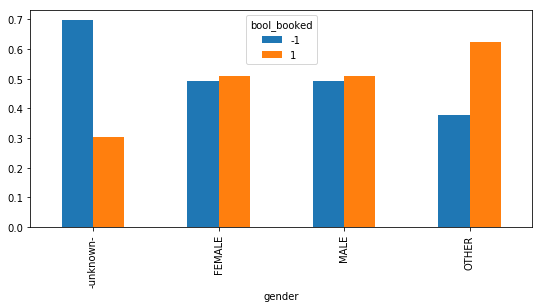

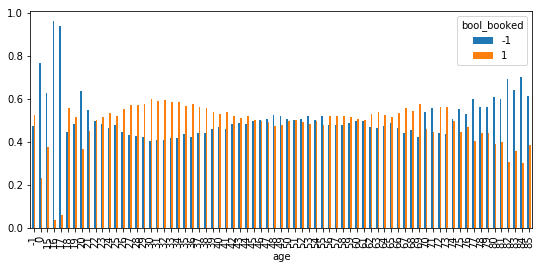

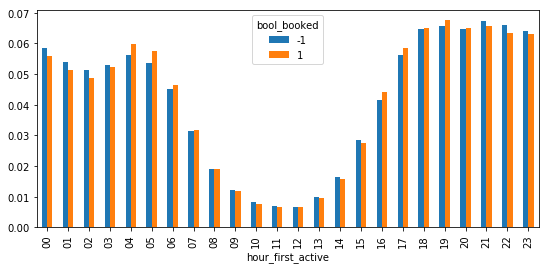

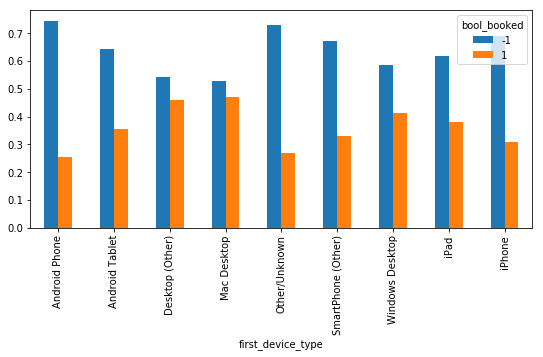

In [37]:
graph_crosstab(feature='gender', normalize=0)
graph_crosstab(feature='age', normalize=0)
graph_crosstab(feature='hour_first_active', normalize=1)
graph_crosstab(feature='first_device_type', normalize=0)

In [36]:
train.fir

'04'

In [ ]:
train[train['first_device_type']=='Mac Desktop'] == 89600 rows
train[(train['first_device_type']=='Mac Desktop') & (train['bool_booked']==1)] == 42250
train[(train['first_device_type']=='Mac Desktop') & (train['bool_booked']==0)] == 47350

In [43]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [56]:

data_category=sessions.columns
for x in list(data_category[1:5]):
    sessions[x]=sessions[x].astype('category')

sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           category
action_type      category
action_detail    category
device_type      category
secs_elapsed     float64
dtypes: category(4), float64(1), object(1)
memory usage: 221.7+ MB


In [66]:

sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [70]:
sessions[['secs_elapsed']].describe()


,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [75]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [89]:
(1/8)*((3-2)**2 + (1- 2)**2+ (0- 1)**2+( 4- 3)**2)

0.5

In [102]:
x=[3,1,0,4]
y=[2,2,1,3]
long=len(x)
s=0
for i in range(long):
    s += (x[i]-y[i])**2
s=s/(2*int(len(x)))
s


TypeError: 'builtin_function_or_method' object is not subscriptable

In [110]:
x=np.array([3,1,0,4])
y=np.array([2,2,1,3])

s=(sum((x-y)**2))/(2*len(x))
s

0.5

In [ ]:
# a faire : un dico avec en clé l'age, et en value(sum(NaN), sum(Sont partis))